# NUMBER PREDICTION USING ANN

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras

In [7]:
from keras.datasets import mnist

## GETTING DATA AND PREPROCESSING IT

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

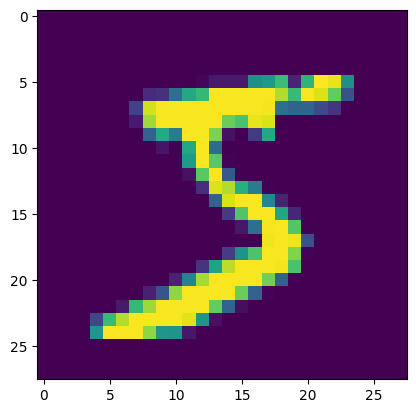

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

## MODEL BUILDING

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [15]:
model = Sequential()

In [24]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                3

In [33]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

## MODEL TRAINING

In [34]:
history = model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 13s 7ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.1435 - val_accuracy: 0.9763
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.1445 - val_accuracy: 0.9773
Epoch 3/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.1369 - val_accuracy: 0.9773
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.1520 - val_accuracy: 0.9778
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.1478 - val_accuracy: 0.9772
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.1526 - val_accuracy: 0.9774
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.1484 - val_accur

In [35]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [36]:
y_pred = y_prob.argmax(axis = 1)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9768

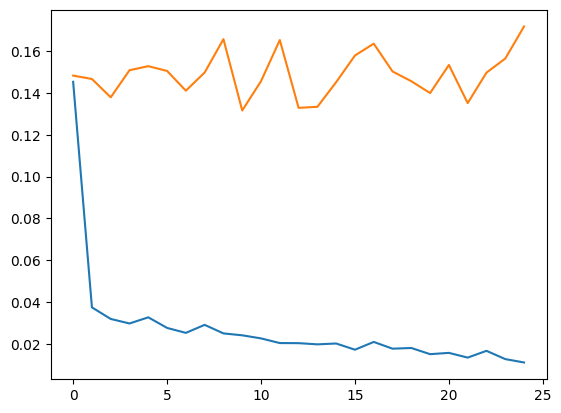

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

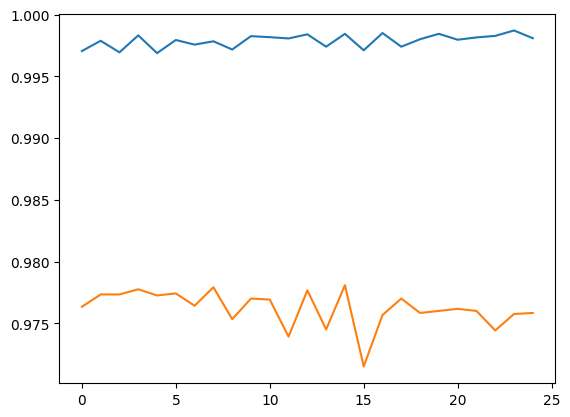

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## NUMBER RECOGNITION

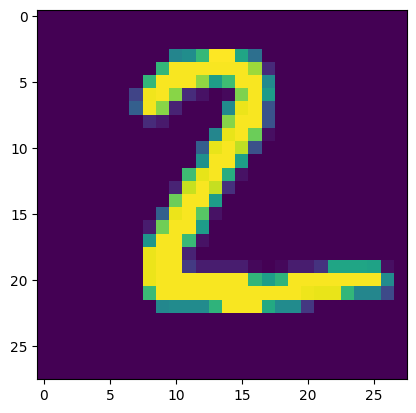

In [42]:
plt.imshow(X_test[1])

In [43]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 81ms/step


array([2], dtype=int64)

## CONCLUSIONS

#### From this model we can easily identy a number in an image using Artificial Neural Network.

#### The accuracy Score for this model is 97.68%